In [59]:
import numpy as np

import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as pdr
import pandas as pd
# For time stamps
import datetime 
import scipy as sp
sp.random.seed(12345)

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','MDB','APPN']

# Set up End and Start times for data grab
end =  datetime.datetime(2020, 2, 20)
start = datetime.datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.get_data_yahoo(stock, start=start, end=end)

In [4]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-20,173.320007,170.990005,171.190002,172.029999,26114400.0,169.807388
2019-02-21,172.369995,170.300003,171.800003,171.059998,17249700.0,168.849930
2019-02-22,173.000000,171.380005,171.580002,172.970001,18913200.0,170.735229
2019-02-25,175.869995,173.949997,174.160004,174.229996,21873400.0,171.978958
2019-02-26,175.300003,173.169998,173.710007,174.330002,17070200.0,172.077667


In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN, MDB,APPN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "MongoDB", "AppianCorp"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sample(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-08-20,213.350006,210.320007,210.880005,210.360001,26884300.0,209.233765,APPLE
2019-08-05,133.929993,130.779999,133.300003,132.210007,42749600.0,130.966629,MICROSOFT
2020-01-30,1457.280029,1436.400024,1439.959961,1455.839966,1339400.0,1455.839966,GOOGLE
2019-07-02,1934.790039,1906.630005,1919.380005,1934.310059,2645900.0,1934.310059,AMAZON
2019-07-26,209.729996,207.139999,207.479996,207.740005,17618900.0,205.845688,APPLE
2019-07-08,201.399994,198.410004,200.809998,200.020004,25338600.0,198.196075,APPLE
2019-11-01,1797.449951,1785.209961,1788.010010,1791.439941,2790400.0,1791.439941,AMAZON
2019-07-01,1929.819946,1914.660034,1922.979980,1922.189941,3203300.0,1922.189941,AMAZON
2019-12-04,263.309998,260.679993,261.070007,261.739990,16795400.0,261.120270,APPLE


In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,230.623202,226.744901,228.456837,228.926324,2.777474e+07,227.468610
std,44.864190,44.271311,44.479908,44.787743,9.733554e+06,45.363537
min,172.369995,169.500000,170.320007,171.059998,1.136200e+07,168.849930
25%,199.559998,195.929993,197.770004,197.919998,2.099050e+07,196.115219
50%,211.839996,207.309998,209.429993,209.009995,2.604360e+07,207.767990
75%,264.010010,260.920013,262.589996,262.200012,3.201100e+07,261.579193
max,327.850006,323.350006,324.739990,327.200012,6.928140e+07,327.200012


In [7]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,1246.351054,1227.945462,1236.274563,1237.986641,1.424483e+06,1237.986641
std,113.750887,113.350502,112.938736,113.978155,6.334457e+05,113.978155
min,1047.489990,1025.000000,1042.900024,1036.229980,3.475000e+05,1036.229980
25%,1169.660034,1145.890015,1156.000000,1162.030029,1.077200e+06,1162.030029
50%,1216.300049,1202.199951,1205.939941,1207.680054,1.307000e+06,1207.680054
75%,1311.310059,1295.650024,1301.479980,1303.050049,1.549600e+06,1303.050049
max,1532.105957,1521.400024,1525.069946,1526.689941,6.207000e+06,1526.689941


In [8]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,140.149882,138.075020,139.197391,139.234071,2.450826e+07,138.220142
std,17.423886,17.097992,17.312220,17.300894,7.690420e+06,17.658463
min,107.940002,106.290001,106.900002,107.150002,8.989200e+06,105.750854
25%,128.000000,126.050003,126.750000,127.129997,1.857610e+07,125.706573
50%,138.500000,136.449997,137.410004,137.389999,2.365490e+07,136.481537
75%,149.800003,148.270004,148.929993,149.479996,2.779220e+07,149.054306
max,190.699997,186.470001,190.649994,188.699997,5.468110e+07,188.185989


In [9]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,1847.115692,1818.575415,1833.833280,1833.783754,3.631173e+06,1833.783754
std,106.850438,104.895105,105.499454,105.601237,1.481939e+06,105.601237
min,1622.719971,1586.569946,1604.010010,1619.439941,8.813000e+05,1619.439941
25%,1779.400024,1749.199951,1767.000000,1765.130005,2.703500e+06,1765.130005
50%,1829.579956,1804.199951,1820.000000,1819.189941,3.216300e+06,1819.189941
75%,1903.790039,1875.449951,1891.369995,1891.300049,4.136500e+06,1891.300049
max,2185.949951,2161.120117,2173.070068,2170.219971,1.556730e+07,2170.219971


In [10]:
APPN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,42.889498,41.037680,41.981621,42.035968,6.435866e+05,42.035968
std,8.229031,7.683579,7.987784,7.981382,5.094724e+05,7.981382
min,32.259998,30.430000,31.090000,31.360001,1.258000e+05,31.360001
25%,36.165001,34.907001,35.500000,35.529999,3.425000e+05,35.529999
50%,41.040001,39.180000,39.830002,40.020000,5.077000e+05,40.020000
75%,49.070000,46.880001,48.299999,48.119999,7.114000e+05,48.119999
max,63.770000,60.779999,63.270000,63.299999,4.969100e+06,63.299999


Из интересного здесь можем заметить, что наибольший разброс между средними ценами high и low у Амазона и Гугла - больше 20 пунктов.Также можем заметить, что Гугл имеет наибольшую волатильность из всех

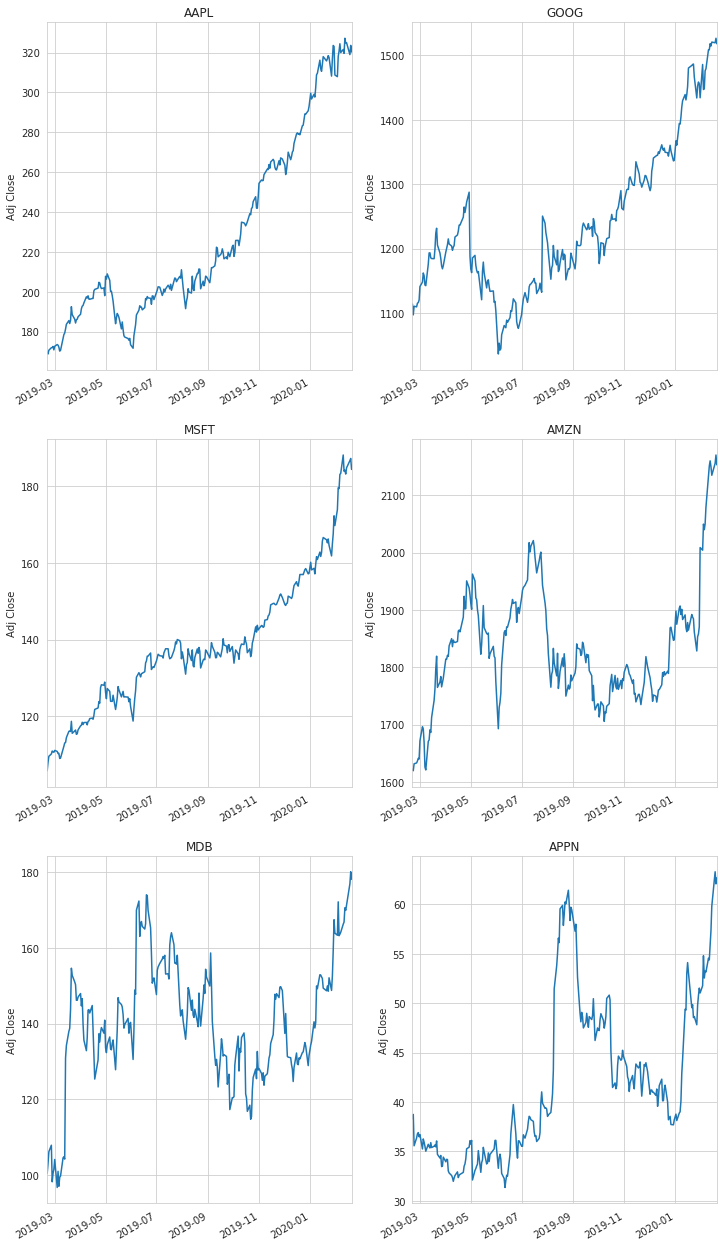

In [11]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=2.25, bottom=2.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Заметим также по графикам, что цены Амазон, Монго и Аппаин не отражали такого положительного тренда как у остальных компаний, однако в начале 2020 года они продемонстрировали резкий рост.

Я решила посмотреть, что стало причиной такого резкого роста цен Амазон в начале 2020г.Оказалось, что это произошло из-за успешного квартального отчета компании 30 января 2020 года. Цены акций выросли на 12%.

Отобразим общие объемы торговли

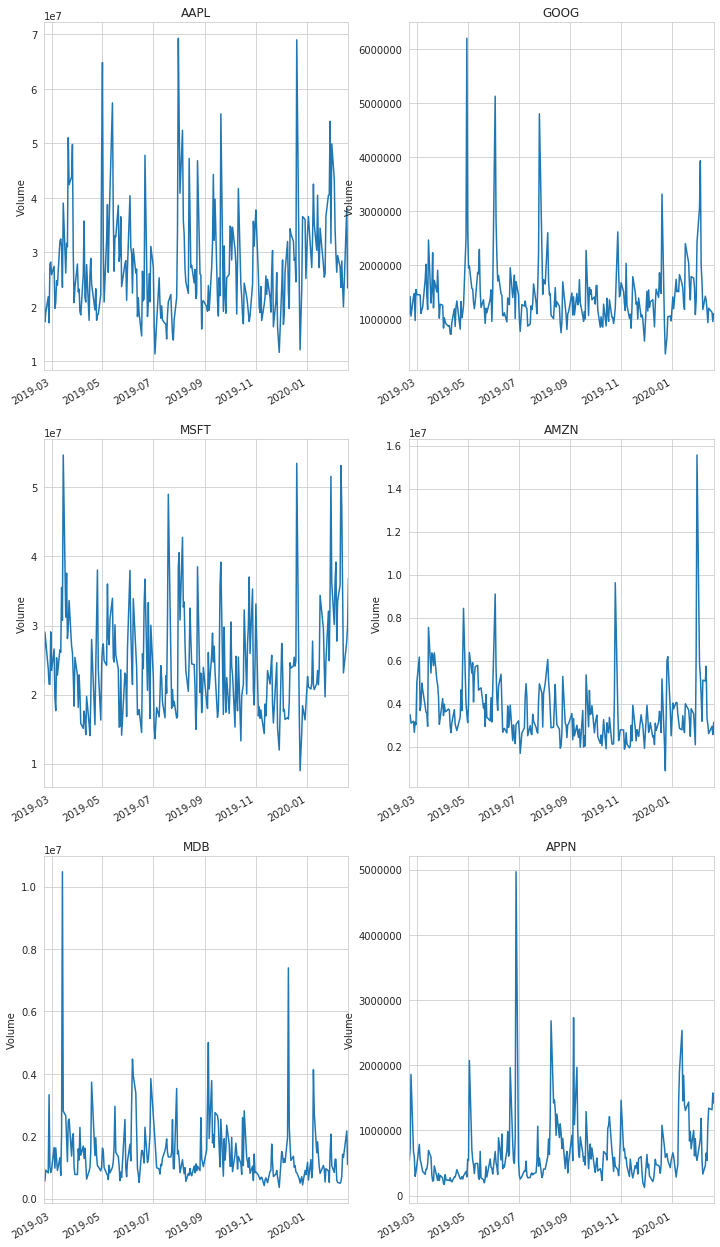

In [73]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=2.25, bottom=2.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Более детально изучим данные. Посчитаем скользящее среднее для данных

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

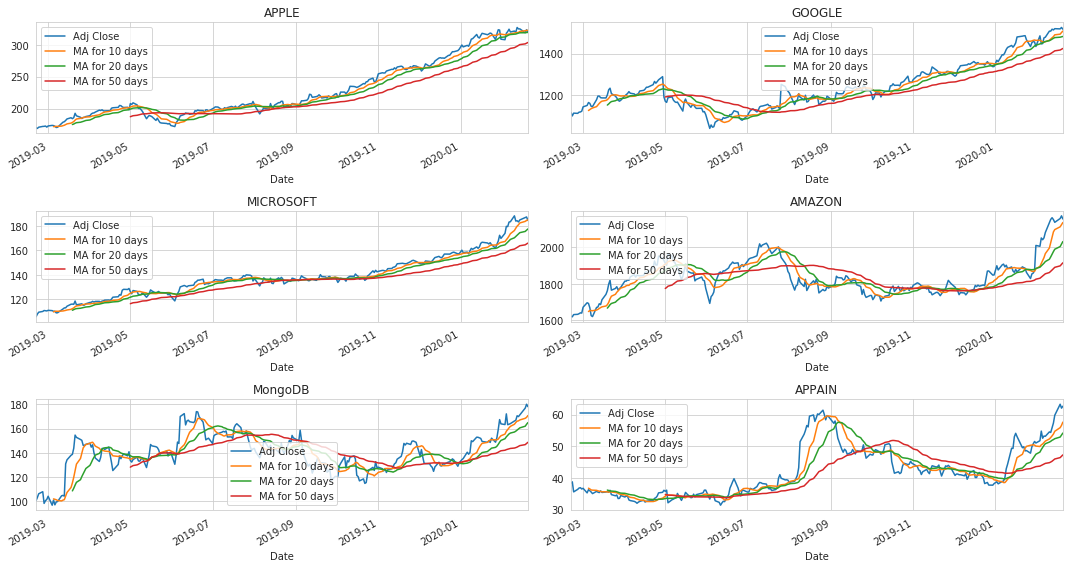

In [78]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')


MDB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('MongoDB')


APPN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('APPAIN')

fig.tight_layout()

В целом все компании, кроме Амазона Монго и Аппаин, на протяжении рассматриваемого периода демонстрировали устойчивый положительный тренд

Посмотрим на ежедневную доходность акций. Видим, что никаких сюрпризов нет - доходность всех акций демонстрирует признаки белого шума.

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()


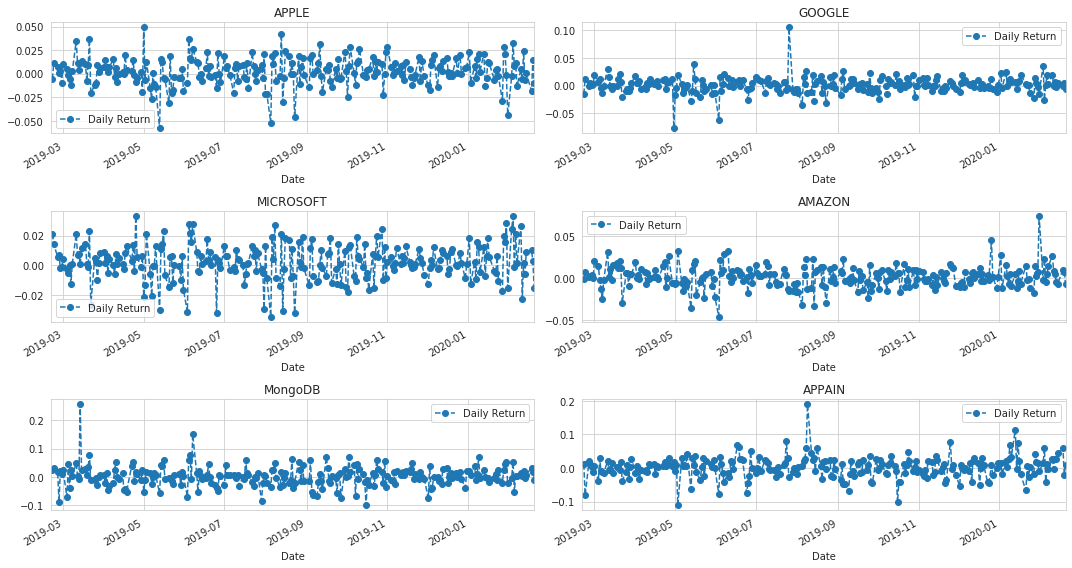

In [8]:

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

MDB['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('MongoDB')


APPN['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('APPAIN')

fig.tight_layout()

Посмотрим на распределение доходностей.Заметим, что большинства компаний оно колеблется в пределах значени 0. Однако, для Монго и Аппаин оно больше скошено в отрицательную область. Для Apple наблюдается скошенность в положительную сторону, однако, при этом видим некоторый дополнительный купол, который образовлся в области отрицательных значений доходности.

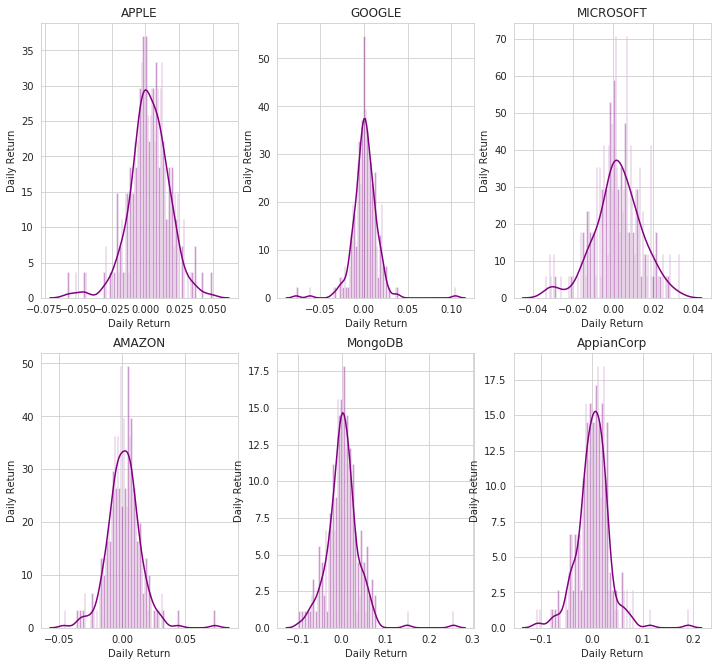

In [94]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))
plt.subplots_adjust(top=2.7, bottom=2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

Отобразим совокупную доходность

In [14]:
for company in company_list:
    company['Сumulative Return'] = company['Daily Return'].add(1).cumprod().sub(1)


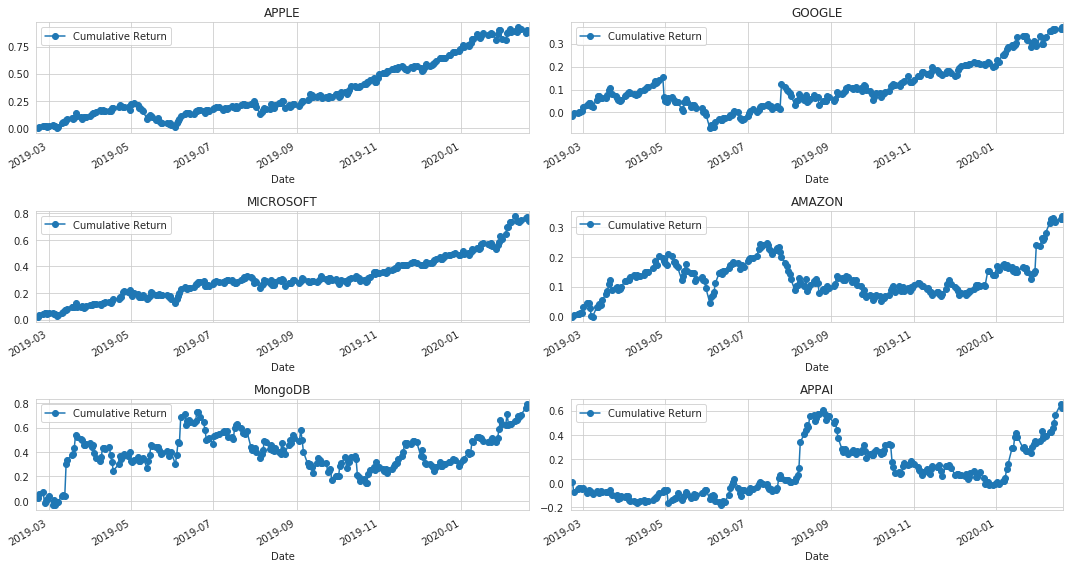

In [99]:
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Сumulative Return'].plot(ax=axes[0,0], legend=True, marker='o')
axes[0,0].set_title('APPLE')

GOOG['Сumulative Return'].plot(ax=axes[0,1], legend=True, marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Сumulative Return'].plot(ax=axes[1,0], legend=True, marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Сumulative Return'].plot(ax=axes[1,1], legend=True,  marker='o')
axes[1,1].set_title('AMAZON')


MDB['Сumulative Return'].plot(ax=axes[2,0], legend=True,  marker='o')
axes[2,0].set_title('MongoDB')


APPN['Сumulative Return'].plot(ax=axes[2,1],  legend=True,  marker='o')
axes[2,1].set_title('APPAI')

fig.tight_layout()

Большую доходность за рассматриваемый период продемонстрировали акции компаний Mongo и Microsoft.

Посчитаем доходность за период - месяц

In [15]:
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1



In [16]:
for company in company_list:
    company['Period Return'] = company['Daily Return'].rolling('30D').apply(multi_period_return)


/home/vika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


/home/vika/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


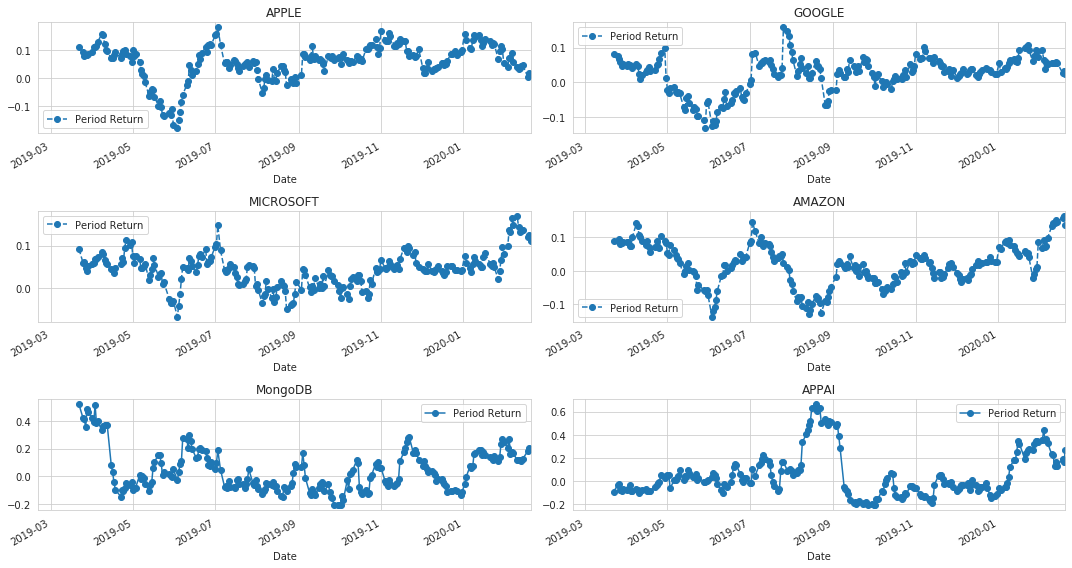

In [238]:

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Period Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Period Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Period Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Period Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

MDB['Period Return'].plot(ax=axes[2,0], legend=True,  marker='o')
axes[2,0].set_title('MongoDB')


APPN['Period Return'].plot(ax=axes[2,1],  legend=True,  marker='o')
axes[2,1].set_title('APPAI')


fig.tight_layout()

Самая устойчивая доходность за месяц была у Гугла, доходность колебалась между 0 и 0.1% , но при этом не росла.Акций Apple колебались уже между 0% и 0.15% и при этом также не демонстрировали явного повышательного тренда. Акции компании Микрософт и Амазон напротив начиная с третьего квартала 2019 демонстрировали устойчивый повышательный тренд. Интересно, что наиболее всего этот тренд заметин у Амазон. Доходность начала расти уже до того, как вышел отчет компании, после которого ее цены резко подскочили.

Из этого графика еще интересно отметить следующее свойство: за короткие периоды доходность по акциям низкая, зачастую даже отрицательная, поэтому держать акции на котороткий период невыгодны. Как мы наблюдали выше, за длительные периоды все акции демонстрировали положительную доходность, то есть акции надо покупать на длительный срок.

Посчитаем корреляцию между ценами различных комапний

Тут не видим ничего интересного, цены всех акций демонстрируют положительную корреляцию , что объяснимо, все компании из одного технологического IT сектора.

In [17]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']


# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN,MDB,APPN
Date,,,,,,
2019-02-20,169.807388,1113.800049,105.750854,1622.099976,100.489998,38.320000
2019-02-21,168.849930,1096.969971,107.981354,1619.439941,103.110001,38.750000
2019-02-22,170.735229,1110.369995,109.520973,1631.560059,106.209999,35.580002
2019-02-25,171.978958,1109.400024,110.132874,1633.000000,107.919998,36.369999
2019-02-26,172.077667,1115.130005,110.892822,1636.400024,98.269997,36.790001


In [18]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,MDB,APPN
Date,,,,,,
2019-02-20,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-21,-0.005638,-0.015111,0.021092,-0.001640,0.026072,0.011221
2019-02-22,0.011166,0.012215,0.014258,0.007484,0.030065,-0.081806
2019-02-25,0.007285,-0.000874,0.005587,0.000883,0.016100,0.022203
2019-02-26,0.000574,0.005165,0.006900,0.002082,-0.089418,0.011548


/home/vika/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/vika/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


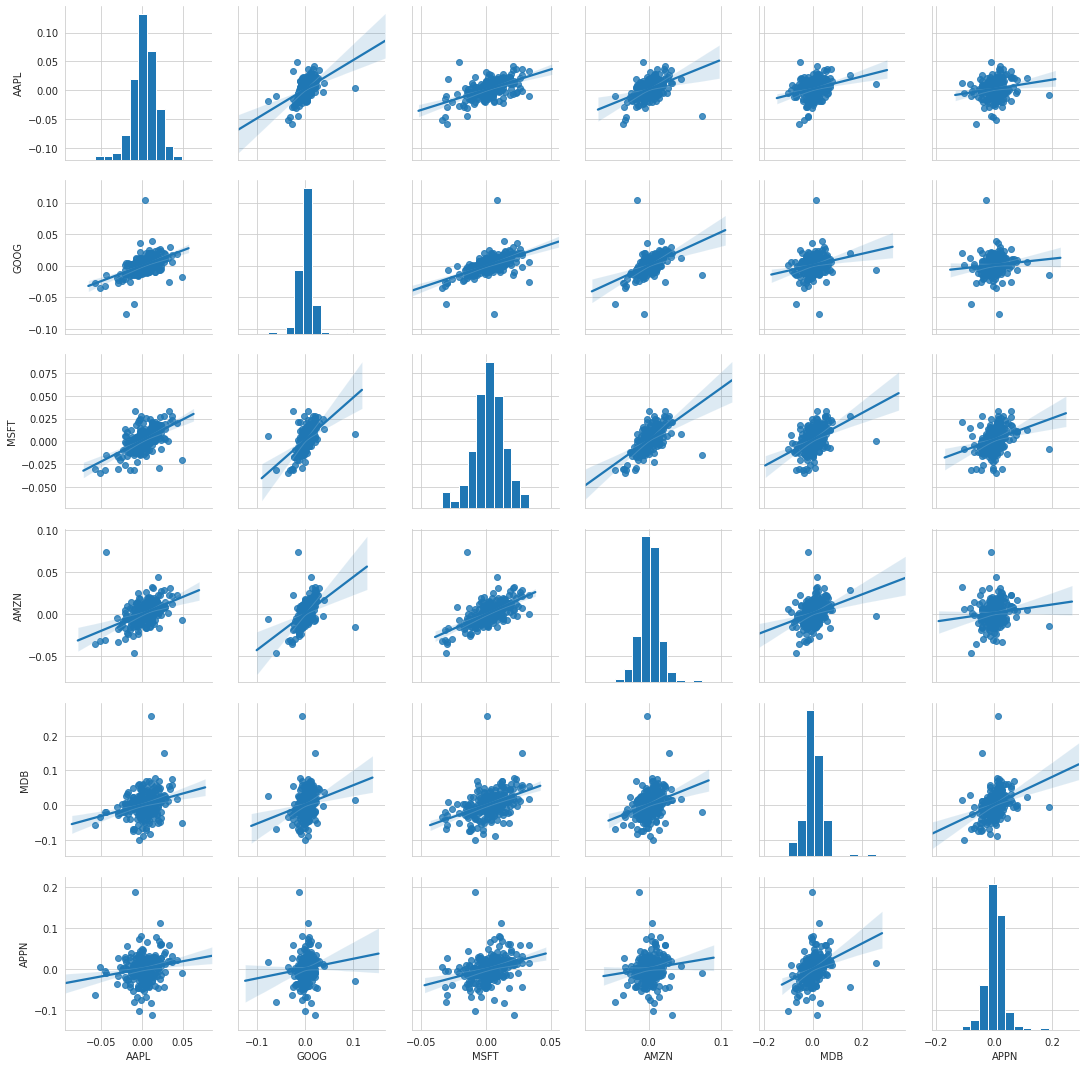

In [105]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

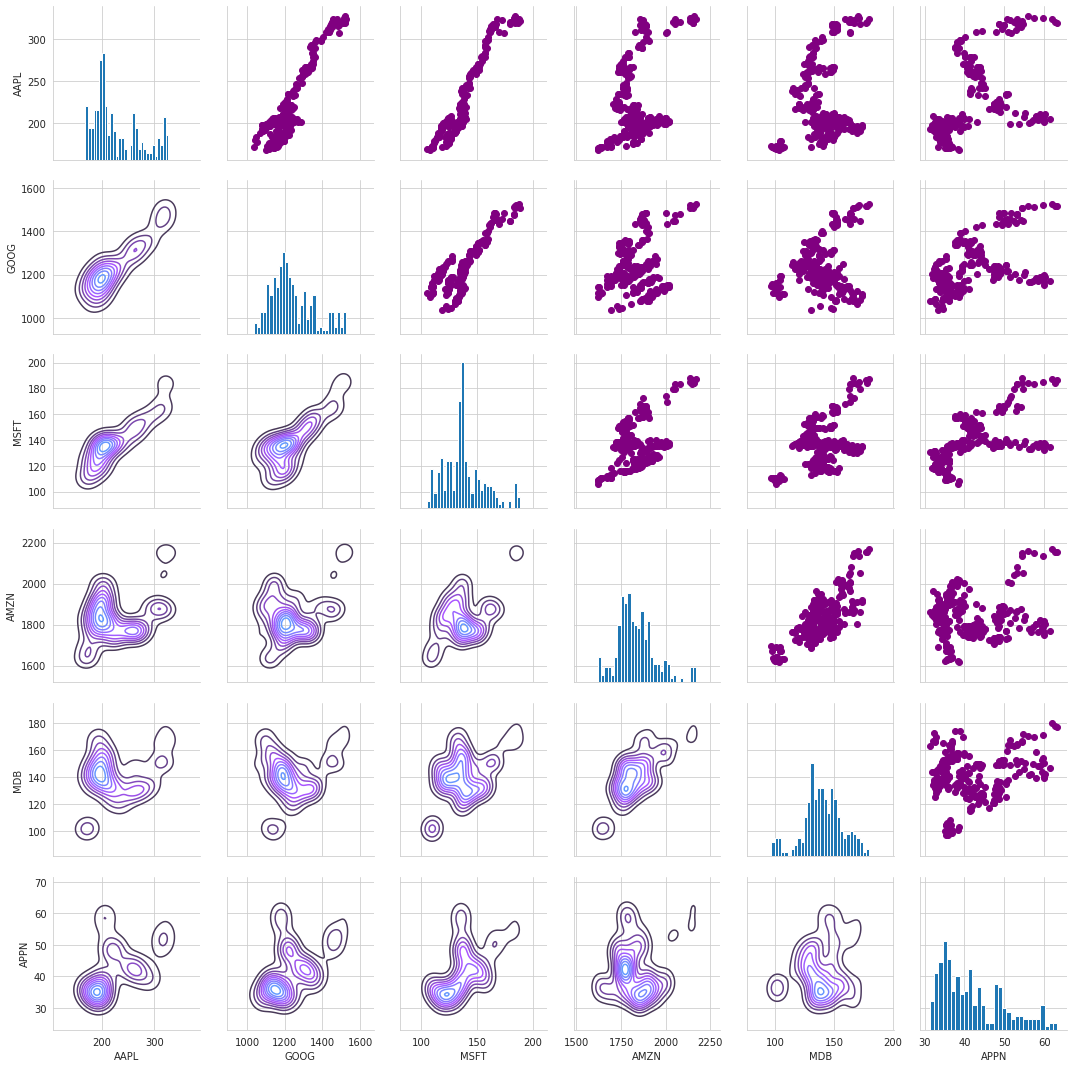

In [106]:

returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Интересно заметить, что больше всего скоррелировны доходности Микрософта и Амазона

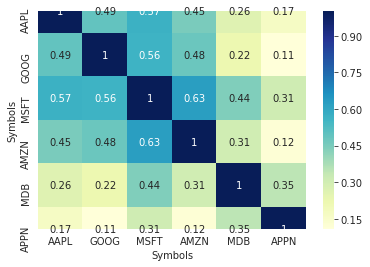

In [107]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
 
sns.heatmap(tech_rets.corr(), annot=True,cmap="YlGnBu");


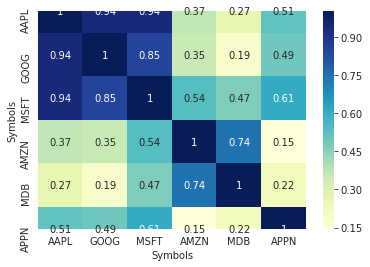

In [108]:
sns.heatmap(closing_df.corr(), annot=True,cmap="YlGnBu");

Расчет волатильности. Волатильность характеризуют общую рискованность актива, считается как скользящее стандартное отклонения за определенный период.

In [19]:
min_periods = 75

for company,name in zip(company_list,tech_list):
        column_name = f"{name} STD for {min_periods} days"
        company[column_name] = company['Adj Close'].rolling(min_periods).std() / np.sqrt(min_periods)

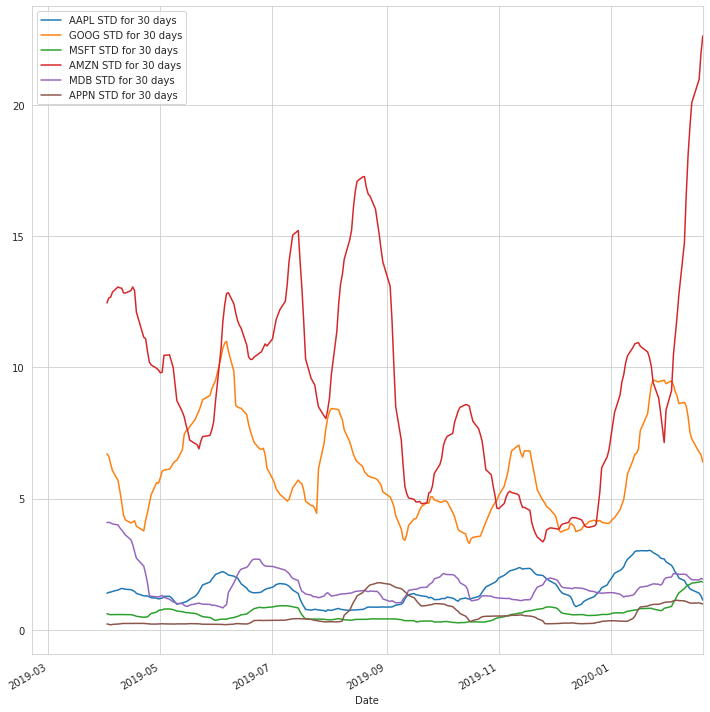

In [171]:
fig, axes = plt.subplots(figsize=(10,10))
# fig.set_figheight(8)
# fig.set_figwidth(15)

AAPL[['AAPL STD for 30 days']].plot(ax=axes)

# axes[0,0].set_title('APPLE')

GOOG[['GOOG STD for 30 days']].plot(ax=axes)
# axes[0,1].set_title('GOOGLE')

MSFT[['MSFT STD for 30 days']].plot(ax=axes)
# axes[1,0].set_title('MICROSOFT')

AMZN[['AMZN STD for 30 days']].plot(ax=axes)
# axes[1,1].set_title('AMAZON')


MDB[['MDB STD for 30 days']].plot(ax=axes)
# axes[2,0].set_title('MongoDB')


APPN[['APPN STD for 30 days']].plot(ax=axes)
# axes[2,1].set_title('APPAIN')

fig.tight_layout()

Можем видеть, что наиболее волатильные - это акции компании Apple и Гугл.

Проведеи анализ риска относительно доходности.

In [225]:
np.random.seed(121)

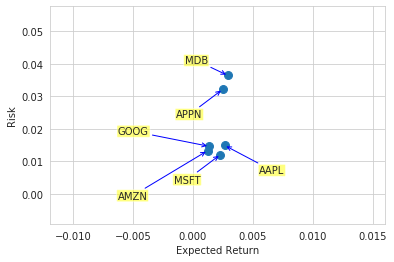

In [229]:
area=np.pi*20
plt.scatter(tech_rets.mean(),tech_rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')


for label, x,y in zip(tech_rets.columns,tech_rets.mean(),tech_rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(100-40*np.random.randint(1,5),30 - 20*np.random.randint(1,5)),
        
        textcoords='offset points',ha='right',va='bottom',
        bbox =dict(boxstyle='round,pad=0.1',fc='yellow',alpha=0.5),
        arrowprops=dict(arrowstyle='->',color='b',connectionstyle='arc,rad=-0.3'))

Можем видеть, что акции компаний Монго и Аппаин имеют примерно одинаковую доходность с акциям Appl и Microsoft, при этом имеют намного больший риск. Поэтому покупка акций таких компаний нежелательна.

# Предсказание доходности, используя Метод Монте Карло

В качестве примера возьмем цены на компанию Appain

In [14]:
APPN.head()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return,Сumulative Return,Period Return,APPN STD for 75 days
Date,,,,,,,,,,,,,,
2019-02-20,39.139999,38.080002,38.340000,38.320000,541800,38.320000,AppianCorp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-21,39.169998,38.110001,38.119999,38.750000,714900,38.750000,AppianCorp,NaN,NaN,NaN,0.011221,0.011221,NaN,NaN
2019-02-22,36.720001,33.500000,36.500000,35.580002,1859500,35.580002,AppianCorp,NaN,NaN,NaN,-0.081806,-0.071503,NaN,NaN
2019-02-25,36.459999,35.430000,36.000000,36.369999,678500,36.369999,AppianCorp,NaN,NaN,NaN,0.022203,-0.050887,NaN,NaN
2019-02-26,37.070000,35.540001,35.700001,36.790001,591500,36.790001,AppianCorp,NaN,NaN,NaN,0.011548,-0.039927,NaN,NaN


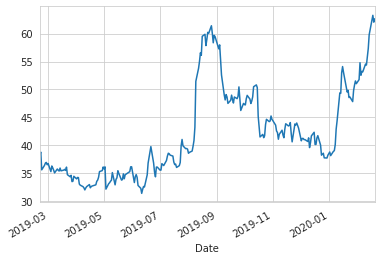

In [240]:
APPN['Adj Close'].plot()

Для того, чтобы применить метод, мы должны будем посчитать Ожидаемую доходность и волатильность. Для этого используем исторические данные, которые у нас есть

CAGR - Compound annual growth rate is a business and investing specific term for the geometric progression ratio that provides a constant rate of return over the time period. 

In [20]:
#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (APPN.index[-1] - APPN.index[0]).days
cagr = ((((APPN['Adj Close'][-1]) / APPN['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

#create a series of percentage returns and calculate 
#the annual volatility of returns

vol = APPN['Daily Return'].std()*np.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = 61.75000000000001%
Annual Volatility = 50.980000000000004%


In [21]:
#Define Variables
S = APPN['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days



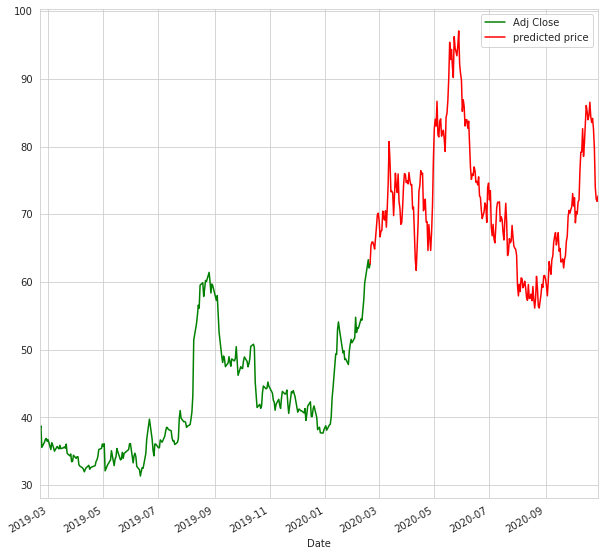

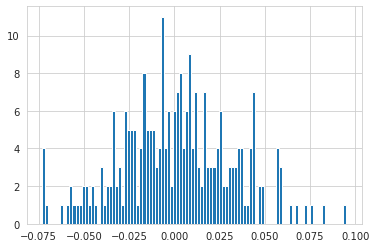

In [22]:

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/np.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)

ind = pd.date_range(start=APPN.index[-1], periods=T+1)
new_price = pd.DataFrame(price_list,columns = ['predicted price'],index=ind)
#Generate Plots - price series and histogram of daily returns
fig, axes = plt.subplots(figsize=(10,10))

APPN[['Adj Close']].plot(ax=axes,c='g',label='original price')
new_price.plot(ax=axes,c='r',label='simulated price')
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

Но сама по себе одна симуляция ничего не дает: вероятность, что данные будут иметь такой вид в будушем практически нулевая. Тут то и будет полезным нагенерировать тысячи таких симуляций и посмотреть, что получается

In [23]:
from tqdm import tqdm

Как можно видеть по графикам смоделированных цен, существует большой разброс между тем, как могут пойти дела.Цена может сильно подняться, либо сильно опуститься. Гистограмма, на которой отображены последние цены для всех сгенерированных рядов позволяет тетче оценить возможные пределы, по которым будет меняться цена. Так, мы можем оценить среднее ожидаемое значение, которая будет иметь цена на конец период, квантили распределения и доверительный интвервал.

100%|██████████| 1000/1000 [00:52<00:00, 18.97it/s]


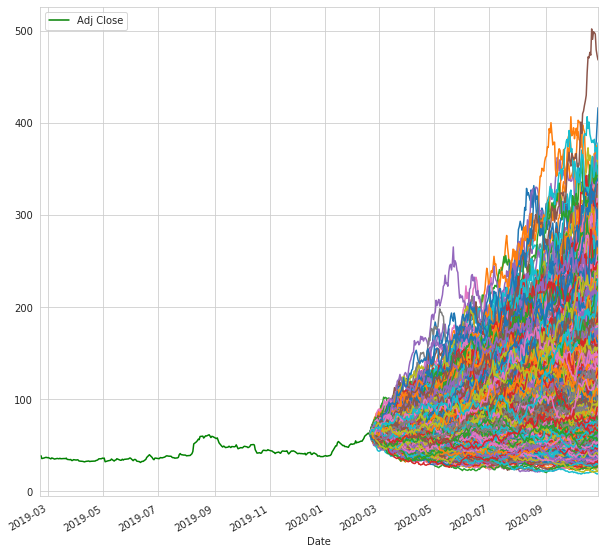

In [24]:
result = []

ind = pd.date_range(start=APPN.index[-1], periods=T+1)

fig, axes = plt.subplots(figsize=(10,10))
APPN[['Adj Close']].plot(ax=axes,c='g')

#choose number of runs to simulate - I have chosen 10,000
for i in tqdm(range(1000)):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/np.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    
    
    new_price = pd.DataFrame(price_list,columns = ['predicted price'],index=ind)
    new_price.plot(ax=axes,legend=False)
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])





Само распределение последних цен на период получилось достаточно интересным - во-первых оно скошено вправо, а во вторых имеет две выраженные вершины. Возможно, это говорит, что та модель, которую мы использовали для симуляции движения цен, недостаточно учитывает все факторы, которые на них влияют, поэтому плохо отражает реальное положение дел. Скорее всего так и есть - для симуляции мы использовали только историческую среднюю доходность и волатильность. В модели мы пока не учитывали возможные внешние факторы, которые могут повлиять на движение цен - ценовые шоки, кризисы, регулирование валютных курсов, движение процентных ставок. Также, мы исходили из предпложения, что волатильность и доходность статичны и не будут меняться с течением времени, что также скорее всего неверно.

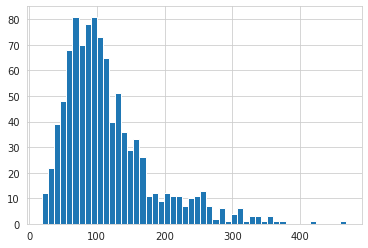

In [25]:
    
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50);

Посчитаем среднюю цену

In [26]:
print(round(np.mean(result),2))

116.17


In [27]:
print("5% quantile =",np.percentile(result,5))
print("95% quantile =",np.percentile(result,95))

5% quantile = 41.88821429501802
95% quantile = 254.91412992069377


Данные квантили показывают, что существует 5% шанс, что цена будет ниже 41.89, и 5%, что выше 254.91. Достаточно большой разброс!

Также можно отобразить эти квантили на графике гистограммы

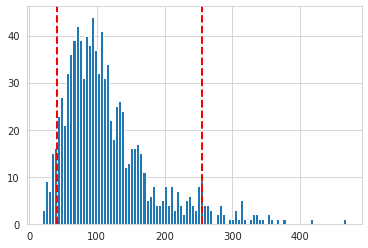

In [28]:
plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

# Моделирование цен, используя Геометрическое Броуновское движение

Попробуем отобразить движение цен с большей точностью. Для этого вопсользуемся моделью Геометрического Броуновского Движения. Оно позволяет отобразить в движении цен как тренд, так и шоковые изменения и часто используются для моделирования цен на акции.

Геометрическое Броуновское движение - это стохастический процесс, который выражается через следующее стохастическое дифференциальное уравнение:

dSt = µStdt + σStdBt

Решение этого уравнения выражается как 

St = S0e
(µ− σ
2
2
)t+σBt

В ходе расчетов будет использоваться следующая форма

Для моделирования скачаем цены Микросфот

In [13]:
# The tech stocks we'll use for this analysis
tech_list = [ 'MSFT']

# Set up End and Start times for data grab
end =  datetime.datetime(2020, 3, 31)
start = datetime.datetime(2020, 1, 1)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.get_data_yahoo(stock, start=start, end=end)

In [14]:
MSFT.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,160.182480
2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,158.187927
2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,158.596817


Average return: 0.07%


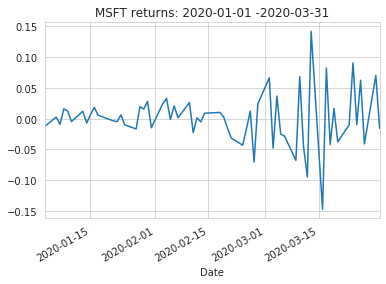

In [15]:
RISKY_ASSET = 'MSFT'
START_DATE = '2020-01-01'
END_DATE = '2020-03-31'

adj_close = MSFT['Adj Close']
returns = adj_close.pct_change().dropna()
print(f'Average return: {100 * returns.mean():.2f}%')
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} -{END_DATE}');

In [28]:
train = returns['2020-01-01':'2020-02-29']
test = returns['2020-03-01':'2020-03-31']

In [29]:
returns

Date
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
2020-01-08    0.015928
2020-01-09    0.012493
                ...   
2020-03-25   -0.009573
2020-03-26    0.062551
2020-03-27   -0.041061
2020-03-30    0.070341
2020-03-31   -0.015727
Name: Adj Close, Length: 61, dtype: float64

In [53]:
T = len(test)
N = len(test)
S_0 = adj_close[train.index[-1].date()]
N_SIM = 10000
mu = train.mean()
sigma = train.std()

In [54]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
     dt = T/N
     dW = np.random.normal(scale = np.sqrt(dt),size=(n_sims, N))
     W = np.cumsum(dW, axis=1)
     time_step = np.linspace(dt, T, N)
     time_steps = np.broadcast_to(time_step, (n_sims, N))
     S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps
     + sigma * W)
     S_t = np.insert(S_t, 0, s_0, axis=1)
     return S_t

In [55]:
N

22

In [56]:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

/home/vika/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/vika/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


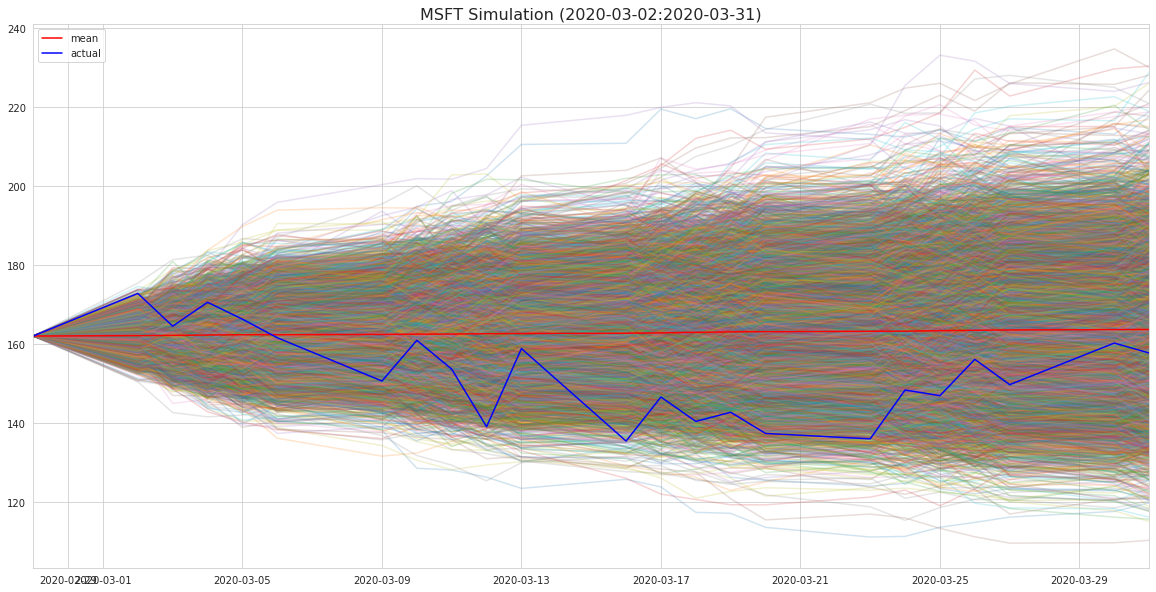

In [58]:
# prepare objects for plotting

LAST_TRAIN_DATE = train.index[-1].date()
FIRST_TEST_DATE = test.index[0].date()
LAST_TEST_DATE = test.index[-1].date()
PLOT_TITLE = (f'{RISKY_ASSET} Simulation 'f'({FIRST_TEST_DATE}:{LAST_TEST_DATE})')
selected_indices = adj_close[LAST_TRAIN_DATE:LAST_TEST_DATE].index
index = [date.date() for date in selected_indices]
gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),index=index)
# plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False)

line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), color='red')
line_2, = ax.plot(index, adj_close[LAST_TRAIN_DATE:LAST_TEST_DATE],color='blue')
ax.set_title(PLOT_TITLE, fontsize=16)
ax.legend((line_1, line_2), ('mean', 'actual'));

С помощью техники понижения дисперсии которая позволяет убыстрить вычисления и повысить точность. Она заключается в том, что мы считаем только половину случайных величин нормального распределения, а другая половина будет как те же величины, но взятые с обратным знаком

In [61]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, antithetic_var=False):
     dt = T/N
     if antithetic_var:
         dW_ant = np.random.normal(scale = np.sqrt(dt),
         size=(int(n_sims/2), N + 1))
         dW = np.concatenate((dW_ant, -dW_ant), axis=0)
     else:
        dW = np.random.normal(scale = np.sqrt(dt),
     size=(n_sims, N + 1))
     S_t = s_0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) * dt + sigma * dW,
     axis=1))
     S_t[:, 0] = s_0
     return S_t

Теперь, когда мы имеем все необходимые инструменты, можем приступить непосредственно к исследованию

# Подготовка данных

In [493]:
# The tech stocks we'll use for this analysis
tech_list_pos = [ 'AMZN','PSTI', 'TLSA','EA','NFLX','PRTK']
tech_list_neg = [ 'MSFT','COP','DAL','F','ALXN','ADS']

# Set up End and Start times for data grab
start =  datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 3, 31)

start_date_train = '2015-01-01'
end_date_train  = '2019-11-30' 
start_date_test = '2019-12-01' 
end_1_month =  '2019-12-31'
end_2_month =  '2020-01-31'
end_3_month =  '2020-02-29'
end_4_month =  '2020-03-31' 

In [494]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list_pos:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.get_data_yahoo(stock, start=start, end=end)

In [495]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list_neg:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.get_data_yahoo(stock, start=start, end=end)

In [498]:
def get_returns(stock, draw=False):
    adj_close = globals().get(stock)['Adj Close']
    returns = adj_close.pct_change().dropna()
    print(f'Average {stock} return: {100 * returns.mean():.2f}%')
    if draw:
        returns.plot(title=f'{stock} returns: {START_DATE} -{END_DATE}')
    return returns


In [499]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [500]:
for stock in tech_list_pos:
    globals()[f'{stock}_returns'] = get_returns(stock)

Average AMZN return: 0.16%
Average PSTI return: -0.08%
Average TLSA return: 0.21%
Average EA return: 0.08%
Average NFLX return: 0.19%
Average PRTK return: -0.10%


In [501]:
for stock in tech_list_neg:
    globals()[f'{stock}_returns'] = get_returns(stock)

Average MSFT return: 0.12%
Average COP return: -0.02%
Average DAL return: -0.01%
Average F return: -0.05%
Average ALXN return: -0.03%
Average ADS return: -0.12%


In [502]:
end_1_month =  '2019-12-31'
end_2_month =  '2020-01-31'
end_3_month =  '2020-02-29'
end_4_month =  '2020-03-31' 

def make_train(stock,start_train = '2015-01-01', end_train = '2019-11-30'):
    globals()[f'{stock}_train'] = globals()[f'{stock}_returns'][start_train:end_train]
def make_test(stock,end_test, start_test = '2019-12-01', prefix=''):
    globals()[f'{stock}_test{prefix}'] = globals()[f'{stock}_returns'][start_test:end_test] 
def train_test_split_stock(stock,end_test, start_test = '2019-12-01', 
                           start_train = '2015-01-01', end_train = '2019-11-30', prefix=''):   
    make_train(stock,start_train = '2015-01-01', end_train = '2019-11-30')
    make_test(stock,end_test, start_test = '2019-12-01', prefix=prefix)

In [503]:
for stock in tech_list_pos:
    make_train(stock)
    make_test(stock,end_1_month,prefix='_1mo')
    make_test(stock,end_2_month,prefix='_2mo')
    make_test(stock,end_3_month,prefix='_3mo')
    make_test(stock,end_4_month,prefix='_4mo')

In [504]:
for stock in tech_list_neg:
    make_train(stock)
    make_test(stock,end_1_month,prefix='_1mo')
    make_test(stock,end_2_month,prefix='_2mo')
    make_test(stock,end_3_month,prefix='_3mo')
    make_test(stock,end_4_month,prefix='_4mo')

In [505]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, antithetic_var=False):
     dt = T/N
     if antithetic_var:
         dW_ant = np.random.normal(scale = np.sqrt(dt),
         size=(int(n_sims/2), N + 1))
         dW = np.concatenate((dW_ant, -dW_ant), axis=0)
     else:
        dW = np.random.normal(scale = np.sqrt(dt),
     size=(n_sims, N + 1))
     S_t = s_0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) * dt + sigma * dW,
     axis=1))
     S_t[:, 0] = s_0
     return S_t

In [509]:
def predict(stock, prefix = '' , n_sim = 10000, antithetic_var=False):
    adj_close = globals()[f'{stock}']['Adj Close']
    
    T = len(globals()[f'{stock}_test{prefix}'])
    N = len(globals()[f'{stock}_test{prefix}'])
    S_0 = adj_close[globals()[f'{stock}_train'].index[-1].date()]
    N_SIM = n_sim
    mu = globals()[f'{stock}_train'].mean()
    sigma = globals()[f'{stock}_train'].std()
    
    globals()[f'{stock}_predicted{prefix}'] =  simulate_gbm(S_0, mu, sigma, N_SIM, T, N, antithetic_var=antithetic_var)

In [510]:
for stock in tech_list_pos:
    predict(stock, prefix = '_1mo',antithetic_var= True)
    predict(stock, prefix = '_2mo',antithetic_var= True)
    predict(stock, prefix = '_3mo',antithetic_var= True)
    predict(stock, prefix = '_4mo',antithetic_var= True)

In [511]:
for stock in tech_list_neg:
    predict(stock, prefix = '_1mo',antithetic_var= True)
    predict(stock, prefix = '_2mo',antithetic_var= True)
    predict(stock, prefix = '_3mo',antithetic_var= True)
    predict(stock, prefix = '_4mo',antithetic_var= True)

Сделаем также ряды фактических цен, чтобы была возможность проанализировать результаты. Дата начала для всех будет одинакова - это дата начала теста, а даты конца - будут равны тестовым датам окончания

In [512]:
def slice_stock_price(stock, start, end, prefix = ''):
    adj_close= globals()[f'{stock}']['Adj Close']
    adj_close_start_price =  globals()[f'{stock}_train'].tail(1)
    globals()[f'{stock}_sliced{prefix}'] = adj_close[start:end]
    globals()[f'{stock}_sliced{prefix}']= globals()[f'{stock}_sliced{prefix}'] \
                    .append(adj_close_start_price).sort_index() #добавляем начальную цену

In [513]:
for stock in tech_list_pos:
    slice_stock_price(stock, '2019-12-01', end_1_month, prefix = '_1mo')
    slice_stock_price(stock, '2019-12-01', end_2_month, prefix = '_2mo')
    slice_stock_price(stock, '2019-12-01', end_3_month, prefix = '_3mo')
    slice_stock_price(stock, '2019-12-01', end_4_month, prefix = '_4mo')

In [514]:
for stock in tech_list_neg:
    slice_stock_price(stock, '2019-12-01', end_1_month, prefix = '_1mo')
    slice_stock_price(stock, '2019-12-01', end_2_month, prefix = '_2mo')
    slice_stock_price(stock, '2019-12-01', end_3_month, prefix = '_3mo')
    slice_stock_price(stock, '2019-12-01', end_4_month, prefix = '_4mo')

Итого мы имеем ряды предсказаний и ряды фактических цен и можем приступать к анализу результатов

# Интерпретация результатов

### Классифицируем результаты

In [515]:
from collections import Counter

In [516]:
def get_probabilities(arr):
    
    """Ищет вероятность того, что цена будет ниже и выше переданной начальной цены"""
    
    total_cnt = len(arr)
    pos_cnt = len(arr[arr>S0])
    neg_cnt = len(arr[arr<=S0])
    return pos_cnt/total_cnt, neg_cnt/total_cnt


In [517]:
def price_likelyhood(arr_of_prob):
    """ 
    Возвращает предсказание движение цен
    True - наиболее вероятно цена поднимится
    False - наиболее вероятно цена опустится
    """
    return arr_of_prob[0] > arr_of_prob[1]

In [537]:
True == True

True

In [518]:
def compare_probs(arr):
    """
    Если и фактическая и предсказанная цена оказались выше первоначальной - True Positive
    Если и фактическая и предсказанная цена оказались ниже первоначальной - True Negative
    
    Если фактическая - выше, а предсказанная - ниже, то False Negative
    Если фактическая - ниже, а предсказанная - выше, то False Positive
    """
    if arr[0] == arr[1]:
        if arr[0]:
            return 'TP'
        else:
            return 'TN'
    else:
        if arr[0] and not arr[1]:
            return 'FN'
        else:
            return 'FP'

In [519]:
def classify_probs(stock, start_price , prefix=''):
    """
    Для переданного актива проводит классификацию предсказанных вероятностей по группам - TP FP TN FN 
    и выводит количество каждой из групп
    """
    
    SO = start_price
    prob_numbers = np.apply_along_axis(get_probabilities, 0, globals()[f'{stock}_predicted{prefix}'])
    
    true_probs =  globals()[f'{stock}_sliced{prefix}'] > SO
    true_probs = true_probs.values
    
    predicted_probs =  np.apply_along_axis(price_likelyhood, 0, prob_numbers)
    
    probs_stacked =  np.stack((true_probs[1:], predicted_probs[1:]))
    
    globals()[f'{stock}_probs{prefix}'] = dict(Counter(np.apply_along_axis(compare_probs, 0, probs_stacked)))

In [520]:
for stock in tech_list_pos:
    classify_probs(stock, S0, prefix = '_1mo')
    classify_probs(stock, S0, prefix = '_2mo')
    classify_probs(stock, S0, prefix = '_3mo')
    classify_probs(stock, S0, prefix = '_4mo')

In [521]:
for stock in tech_list_neg:
    classify_probs(stock, S0, prefix = '_1mo')
    classify_probs(stock, S0, prefix = '_2mo')
    classify_probs(stock, S0, prefix = '_3mo')
    classify_probs(stock, S0, prefix = '_4mo')

In [522]:
import re

In [523]:
def prepare_prob_df(stock, prefix = ''):
    df = pd.DataFrame.from_dict(globals()[f'{stock}_probs{prefix}'], columns=['val'], orient='index')
    df['ticker'] = stock
    if prefix != '':
        match = re.search(r'\d',prefix)
        if match:
            df['mo'] = match.group(0)
        else:
            return 
    globals()[f'{stock}_probs_df{prefix}'] = df

In [524]:
for stock in tech_list_pos:
    prepare_prob_df(stock, prefix = '_1mo')
    prepare_prob_df(stock, prefix = '_2mo')
    prepare_prob_df(stock, prefix = '_3mo')
    prepare_prob_df(stock, prefix = '_4mo')

In [525]:
for stock in tech_list_neg:
    prepare_prob_df(stock, prefix = '_1mo')
    prepare_prob_df(stock, prefix = '_2mo')
    prepare_prob_df(stock, prefix = '_3mo')
    prepare_prob_df(stock, prefix = '_4mo')

In [526]:
def concat_probs_df(prefix=''):
    df_all = []
    for stock in tech_list_pos + tech_list_neg:
        df_all.append(globals()[f'{stock}_probs_df{prefix}'])
    return pd.concat(df_all)

In [527]:
df1 = concat_probs_df(prefix='_1mo')
df2 = concat_probs_df(prefix='_2mo')
df3 = concat_probs_df(prefix='_3mo')
df4 = concat_probs_df(prefix='_4mo')

df_probs_all = pd.concat((df1,df2, df3, df4)).reset_index()

In [528]:
df_probs_all.loc[df_probs_all['index'].isin(['FN','TN']),'val'] = df_probs_all.loc[df_probs_all['index'].isin(['FN','TN']),:].val * (-1)

In [529]:
import seaborn
rcParams['figure.figsize'] = 20, 10
sns.set(font_scale = 2)

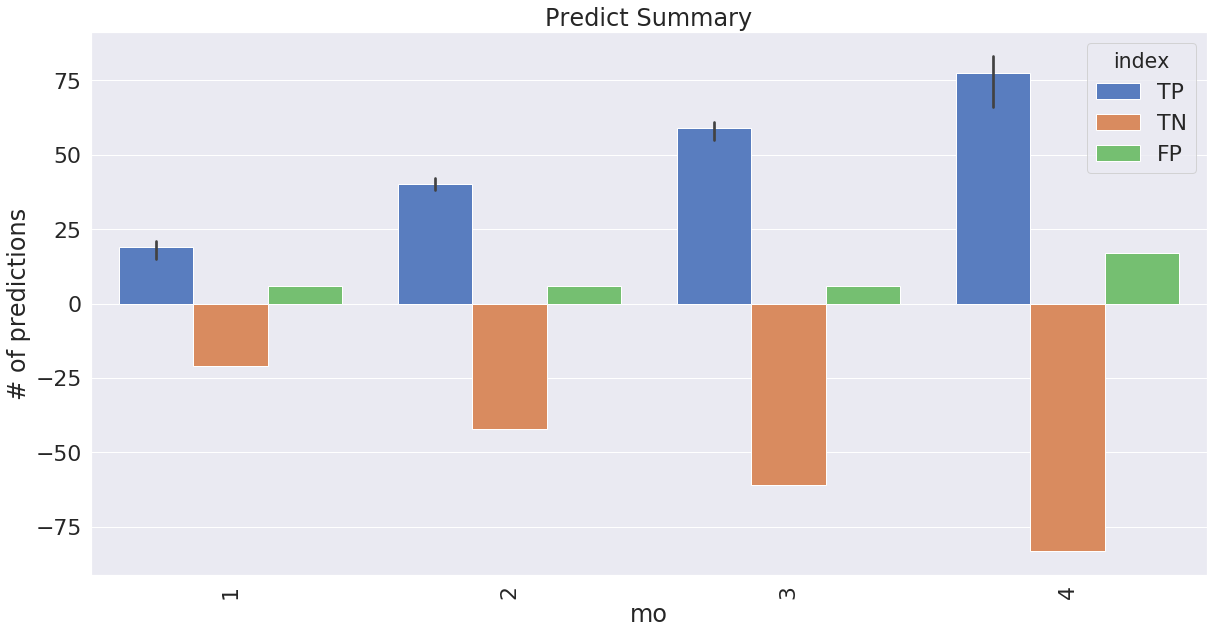

In [530]:
sns.barplot(x='mo', y='val', hue='index', data=df_probs_all,palette="muted")
plt.xticks(rotation=90)
plt.ylabel('# of predictions')
plt.title('Predict Summary');

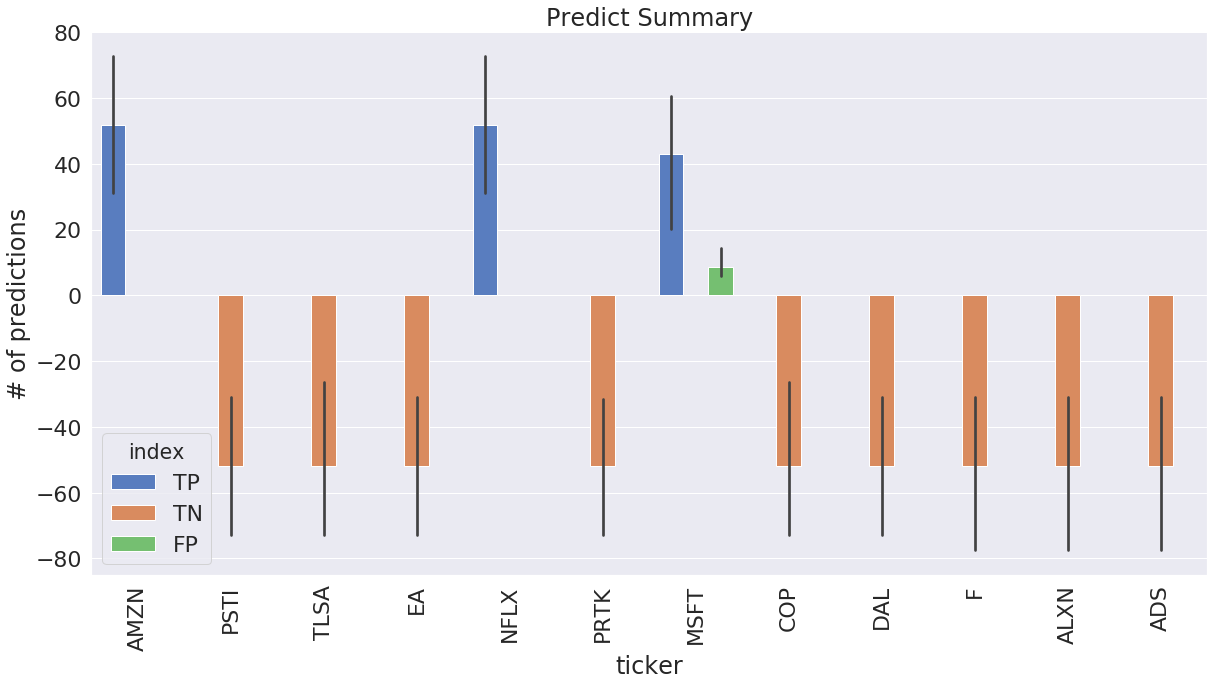

In [531]:
sns.barplot(x='ticker', y='val', hue='index', data=df_probs_all,palette="muted")
plt.xticks(rotation=90)
plt.ylabel('# of predictions')
plt.title('Predict Summary');

### Рисуем получившееся распределение

In [533]:
def draw_distr(stock_list, prefix=''):
    for i, stock in enumerate(stock_list, 1):
        data = globals()[f'{stock}_predicted{prefix}'][:,-1]
        actual = globals()[f'{stock}_sliced{prefix}']
        mu_actual = np.mean(actual)
        plt.subplot(2, 3, i)
        sns.distplot(data, bins=100, color='purple', label='Norm PDF')
        plt.axvline(np.percentile(data,15.87), color='g', linestyle='dashed', linewidth=4, label='-1 sigma')
        plt.axvline(np.percentile(data,84.13), color='g', linestyle='dashed', linewidth=4, label='+1 sigma')
        plt.axvline(mu_actual, color='r', linestyle='dashed', linewidth=5, label='Actual price')
        plt.legend()
        plt.title(f'{stock}{prefix}')


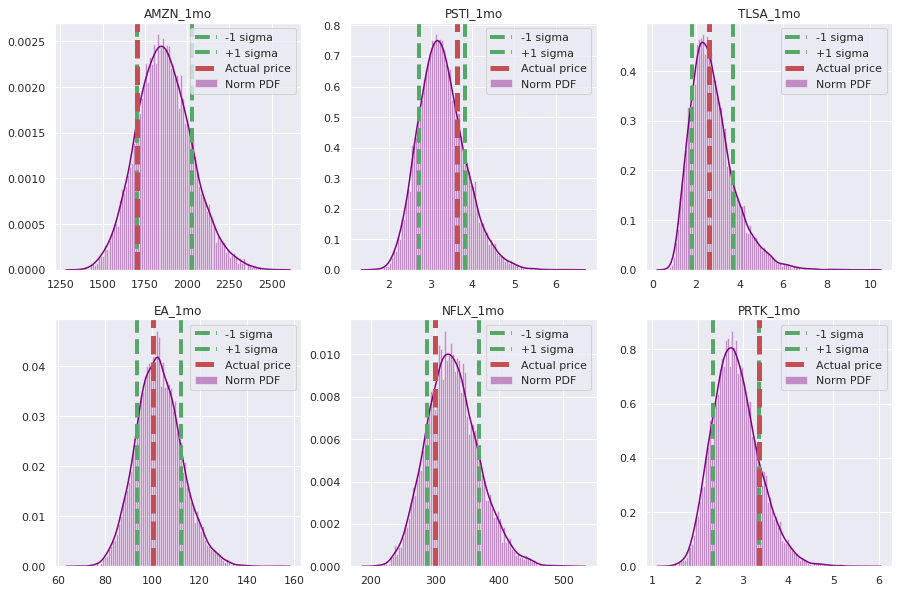

In [534]:
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1)    
draw_distr(tech_list_pos, prefix='_1mo');

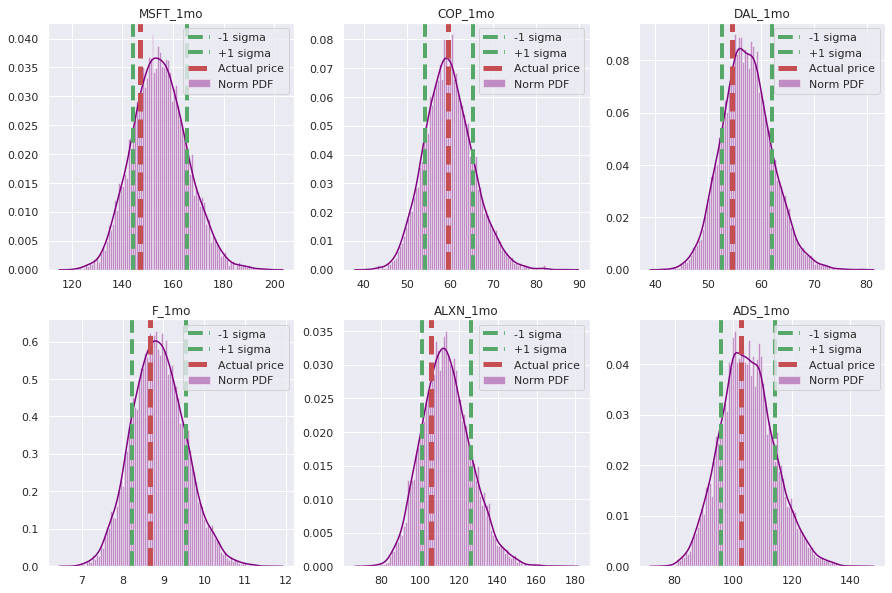

In [535]:
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1)    
draw_distr(tech_list_neg, prefix='_1mo');